# Project: Airlines Departure and Arrival Analysis 

# Name: Tan Wai Kit


# Initial Dataset Exploration

In [1]:
#Import essential packages/libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data_of_2006 = pd.read_csv("2006.csv")
data_of_2007 = pd.read_csv("2007.csv")
carriers_data = pd.read_csv("carriers.csv")
airports_data = pd.read_csv("airports.csv")
planes_data = pd.read_csv("plane-data.csv")

In [4]:
data_of_2006.head(n=10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,45,13,0,NaN,0,0,0,0,0,0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,27,19,0,NaN,0,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,4,11,0,NaN,0,0,0,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,16,10,0,NaN,0,0,0,0,0,0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,27,12,0,NaN,0,0,0,0,0,0
5,2006,1,11,3,627.0,630,834.0,832,US,295,...,6,13,0,NaN,0,0,0,0,0,0
6,2006,1,11,3,825.0,820,1041.0,1021,US,349,...,4,21,0,NaN,0,0,0,20,0,0
7,2006,1,11,3,942.0,945,1155.0,1148,US,356,...,4,8,0,NaN,0,0,0,0,0,0
8,2006,1,11,3,1239.0,1245,1438.0,1445,US,775,...,4,12,0,NaN,0,0,0,0,0,0
9,2006,1,11,3,1642.0,1645,1841.0,1845,US,1002,...,4,10,0,NaN,0,0,0,0,0,0


In [5]:
data_of_2006.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7141922 entries, 0 to 7141921
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay      

In [6]:
data_of_2007.head(n=10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,4,11,0,NaN,0,0,0,0,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,5,6,0,NaN,0,0,0,0,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,6,9,0,NaN,0,3,0,0,0,31
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,3,8,0,NaN,0,23,0,0,0,3
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,3,9,0,NaN,0,0,0,0,0,0
5,2007,1,1,1,1430.0,1420,1553.0,1550,WN,2386,...,2,7,0,NaN,0,0,0,0,0,0
6,2007,1,1,1,1936.0,1840,2217.0,2130,WN,409,...,5,7,0,NaN,0,46,0,0,0,1
7,2007,1,1,1,944.0,935,1223.0,1225,WN,1131,...,4,9,0,NaN,0,0,0,0,0,0
8,2007,1,1,1,1537.0,1450,1819.0,1735,WN,1212,...,5,7,0,NaN,0,20,0,0,0,24
9,2007,1,1,1,1318.0,1315,1603.0,1610,WN,2456,...,5,8,0,NaN,0,0,0,0,0,0


In [7]:
data_of_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7453215 entries, 0 to 7453214
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay      

In [8]:
carriers_data.head(n=10)

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.
5,09Q,"Swift Air, LLC"
6,0BQ,DCA
7,0CQ,ACM AIR CHARTER GmbH
8,0FQ,"Maine Aviation Aircraft Charter, LLC"
9,0GQ,"Inter Island Airways, d/b/a Inter Island Air"


In [9]:
carriers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1491 entries, 0 to 1490
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Code         1490 non-null   object
 1   Description  1491 non-null   object
dtypes: object(2)
memory usage: 23.4+ KB


In [10]:
airports_data.head(n=10)

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944
5,01M,Tishomingo County,Belmont,MS,USA,34.491667,-88.201111
6,02A,Gragg-Wade,Clanton,AL,USA,32.850487,-86.611453
7,02C,Capitol,Brookfield,WI,USA,43.087510,-88.177869
8,02G,Columbiana County,East Liverpool,OH,USA,40.673313,-80.641406
9,03D,Memphis Memorial,Memphis,MO,USA,40.447259,-92.226961


In [11]:
airports_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   iata     3376 non-null   object 
 1   airport  3376 non-null   object 
 2   city     3364 non-null   object 
 3   state    3364 non-null   object 
 4   country  3376 non-null   object 
 5   lat      3376 non-null   float64
 6   long     3376 non-null   float64
dtypes: float64(2), object(5)
memory usage: 184.8+ KB


In [12]:
planes_data.head(n=10)

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,N056AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,N057AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,N058AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,N059AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,N060AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
planes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tailnum        5029 non-null   object
 1   type           4480 non-null   object
 2   manufacturer   4480 non-null   object
 3   issue_date     4480 non-null   object
 4   model          4480 non-null   object
 5   status         4480 non-null   object
 6   aircraft_type  4480 non-null   object
 7   engine_type    4480 non-null   object
 8   year           4480 non-null   object
dtypes: object(9)
memory usage: 353.7+ KB


## Question 1

In [14]:
#Concatenating/combining dataframes (2006 & 2007)
data_merged = pd.concat([data_of_2006, data_of_2007])
data_merged2 = data_merged[data_merged["ArrDelay"] >= 0]
data_merged2 = data_merged[data_merged["DepDelay"] >= 0]
print(data_merged2)

         Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
1        2006      1          11          3   1053.0        1053   1313.0   
2        2006      1          11          3   1915.0        1915   2110.0   
6        2006      1          11          3    825.0         820   1041.0   
10       2006      1          11          3   1836.0        1835      NaN   
13       2006      1          11          3   1125.0        1125   1242.0   
...       ...    ...         ...        ...      ...         ...      ...   
7453207  2007     12          15          6   1341.0        1335   1856.0   
7453208  2007     12          15          6   1646.0        1645   1827.0   
7453211  2007     12          15          6   1902.0        1851   2110.0   
7453213  2007     12          15          6   1353.0        1315   1658.0   
7453214  2007     12          15          6   1824.0        1800   2001.0   

         CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelle

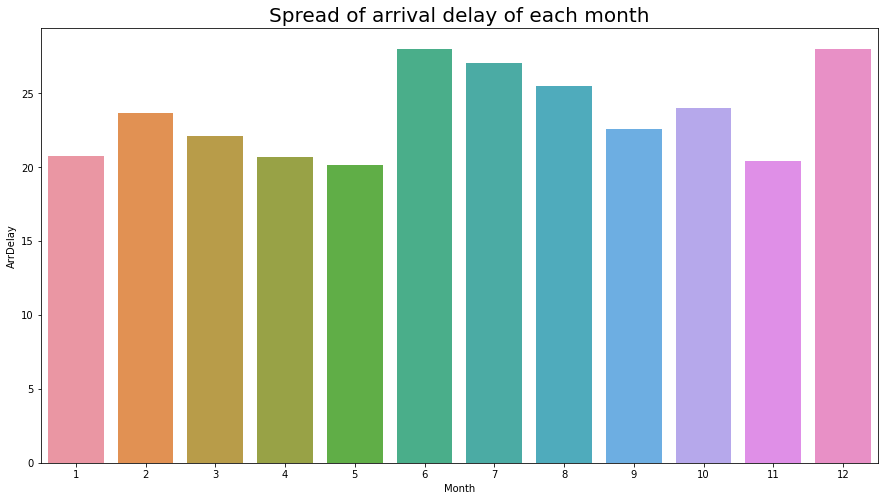

In [15]:
#Finding best month of the year to minimise delays
data_monthofyear = data_merged2.groupby("Month", as_index = False)["ArrDelay"].mean()
plt.figure(figsize = (15,8))
sns.barplot(x = "Month", y = "ArrDelay", data = data_monthofyear)
plt.title("Spread of arrival delay of each month", fontsize = 20)
plt.show()

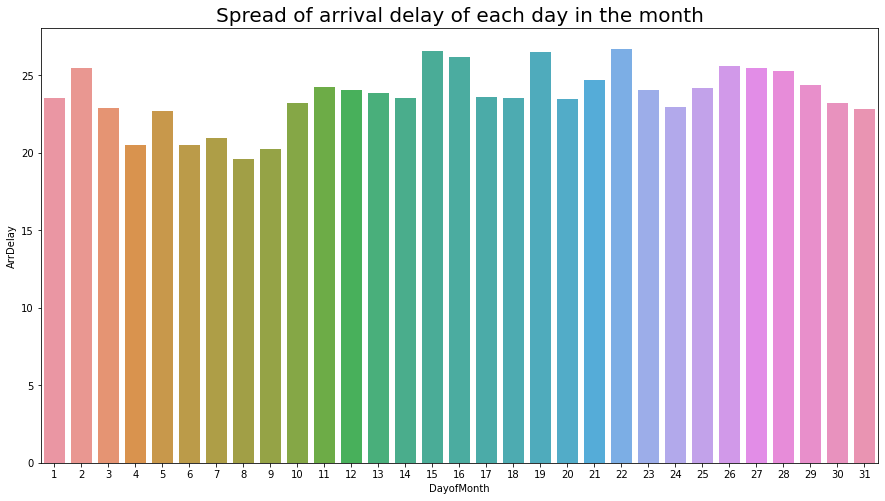

In [16]:
#Finding best day of the month to minimise delays
data_dayofmonth = data_merged2.groupby("DayofMonth", as_index = False)["ArrDelay"].mean()
plt.figure(figsize = (15,8))
sns.barplot(x = "DayofMonth", y = "ArrDelay", data = data_dayofmonth)
plt.title("Spread of arrival delay of each day in the month", fontsize = 20)
plt.show()

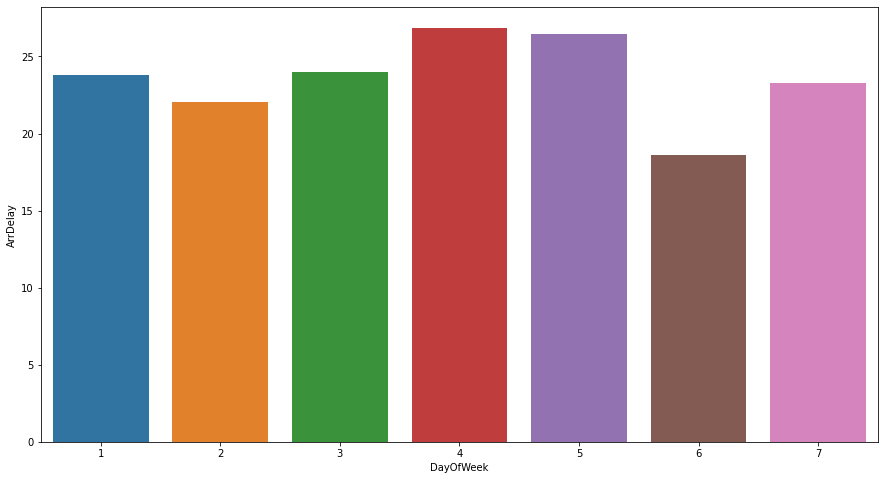

In [17]:
#Finding best day of the week to minimise delays
data_dayofweek = data_merged2.groupby("DayOfWeek", as_index = False)["ArrDelay"].mean()
plt.figure(figsize = (15,8))
sns.barplot(x = "DayOfWeek", y = "ArrDelay", data = data_dayofweek)
plt.show()

In [18]:
#Create copy of data_merged2 to be used for other questions due to subsequent manipulation for Q1
data_merged3 = data_merged2.copy(deep = True)
print(data_merged3)

         Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
1        2006      1          11          3   1053.0        1053   1313.0   
2        2006      1          11          3   1915.0        1915   2110.0   
6        2006      1          11          3    825.0         820   1041.0   
10       2006      1          11          3   1836.0        1835      NaN   
13       2006      1          11          3   1125.0        1125   1242.0   
...       ...    ...         ...        ...      ...         ...      ...   
7453207  2007     12          15          6   1341.0        1335   1856.0   
7453208  2007     12          15          6   1646.0        1645   1827.0   
7453211  2007     12          15          6   1902.0        1851   2110.0   
7453213  2007     12          15          6   1353.0        1315   1658.0   
7453214  2007     12          15          6   1824.0        1800   2001.0   

         CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelle

In [19]:
#Finding best time of the day to minimise delays
print(data_merged2["DepTime"].astype(str))

departure_scheduled_time = []
for hour in data_merged2["DepTime"].astype(str):
    if len(hour) == 6:
        hour = hour[:2]
    elif len(hour) == 5:
        hour = hour[:1]
    elif len(hour) <= 4:
        hour = 24
    departure_scheduled_time.append(hour)

1          1053.0
2          1915.0
6           825.0
10         1836.0
13         1125.0
            ...  
7453207    1341.0
7453208    1646.0
7453211    1902.0
7453213    1353.0
7453214    1824.0
Name: DepTime, Length: 7442544, dtype: object


In [20]:
len(departure_scheduled_time)

7442544

In [21]:
data_merged2["TimeoftheDay"] = departure_scheduled_time

<ipython-input-21-92517b6b4b2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_merged2["TimeoftheDay"] = departure_scheduled_time


In [22]:
data_merged2["TimeoftheDay"] = data_merged2["TimeoftheDay"].astype(int)

<ipython-input-22-8d4586f60ac6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_merged2["TimeoftheDay"] = data_merged2["TimeoftheDay"].astype(int)


In [23]:
data_merged2 = data_merged2.drop(data_merged2[data_merged2.TimeoftheDay > 24].index)
data_merged2["TimeoftheDay"].value_counts()

17    552564
16    517028
18    510168
19    509453
15    507205
14    487985
13    486040
12    457939
11    457886
10    438152
9     410067
20    403942
8     384954
7     348773
21    345521
6     299932
22    171579
23     79666
24     35857
5      22070
1      11078
2       3018
3        939
4        531
Name: TimeoftheDay, dtype: int64

In [24]:
data_merged2["TimeoftheDay"]

1          10
2          19
6           8
10         18
13         11
           ..
7453207    13
7453208    16
7453211    19
7453213    13
7453214    18
Name: TimeoftheDay, Length: 7442347, dtype: int64

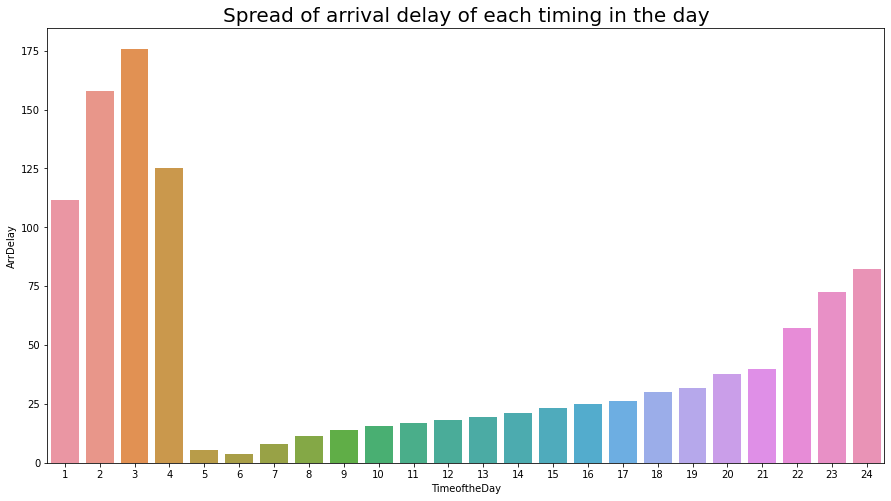

In [25]:
data_timeofday = data_merged2.groupby("TimeoftheDay", as_index = False)["ArrDelay"].mean()
plt.figure(figsize = (15,8))
sns.barplot(x = "TimeoftheDay", y = "ArrDelay", data = data_timeofday)
plt.title("Spread of arrival delay of each timing in the day", fontsize = 20)
plt.show()

## Question 2

In [26]:
planes_data.tail(n=20)

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
5009,N991AT,Corporation,BOEING,08/29/2002,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,None
5010,N991cA,Corporation,CANADAIR,08/30/2007,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998
5011,N991DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,01/06/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1991
5012,N991HA,Corporation,DEHAVILLAND,05/15/2008,DHC-8-202,Valid,Fixed Wing Multi-Engine,Turbo-Prop,1996
5013,N992AT,Corporation,BOEING,09/12/2002,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002
5014,N992DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,01/10/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1991
5015,N993AT,Corporation,BOEING,07/23/2002,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002
5016,N993DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,02/07/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1991
5017,N994AT,Corporation,BOEING,11/05/2002,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002
5018,N994DL,Corporation,MCDONNELL DOUGLAS CORPORATION,02/03/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1991


In [27]:
print("Columns of Planes Data BEFORE renaming:", planes_data.columns)
print("\n")
print("Columns of Year Merged Data:", data_merged2.columns)

Columns of Planes Data BEFORE renaming: Index(['tailnum', 'type', 'manufacturer', 'issue_date', 'model', 'status',
       'aircraft_type', 'engine_type', 'year'],
      dtype='object')


Columns of Year Merged Data: Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'TimeoftheDay'],
      dtype='object')


In [28]:
#Changing column name: ["tailnum"] to ["TailNum"] which matches data_merged data
planes_data = planes_data.rename(inplace = False, columns = {"tailnum":"TailNum"})

#Changing column name: ["year"] to ["PlaneManufacturedYear"] for easier differentiation from data_merged data
#planes_data = planes_data.rename(inplace = False, columns = {"year":"PlaneManufacturedYear"})

print("Columns of Planes Data AFTER renaming:", planes_data.columns)

Columns of Planes Data AFTER renaming: Index(['TailNum', 'type', 'manufacturer', 'issue_date', 'model', 'status',
       'aircraft_type', 'engine_type', 'year'],
      dtype='object')


In [29]:
#Merging and finding common data between planes_data and data_merged3
data_merged_q2 = pd.merge(data_merged2, planes_data, how = "inner", on = "TailNum")

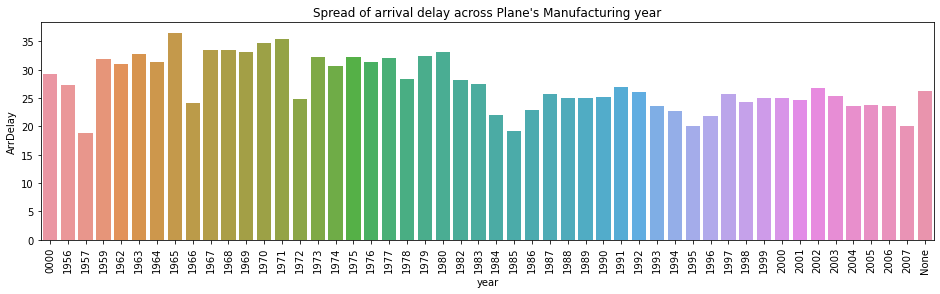

In [30]:
#Plot for Spread of arrival delay across Plane's Manufacturing year
plt.figure(figsize = (16,4))
data_withPlanes = data_merged_q2.groupby("year", as_index = False)["ArrDelay"].mean()
sns.barplot(x = "year", y = "ArrDelay", data = data_withPlanes)
plt.title("Spread of arrival delay across Plane's Manufacturing year")
#plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.show()

# Question 3

In [31]:
#Cleaning of individual 2006 Data
data_of_2006_clean = data_of_2006.dropna(subset=["DepDelay", "ArrDelay"])
data_of_2006_clean = data_of_2006_clean.drop_duplicates()
data_of_2006_clean = data_of_2006_clean[data_of_2006_clean["Cancelled"] == 0]
data_of_2006_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7003796 entries, 0 to 7141921
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay      

In [32]:
#Cleaning of individual 2007 Data
data_of_2007_clean = data_of_2007.dropna(subset=["DepDelay", "ArrDelay"])
data_of_2007_clean = data_of_2007_clean.drop_duplicates()
data_of_2007_clean = data_of_2007_clean[data_of_2007_clean["Cancelled"] == 0]
data_of_2007_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7275261 entries, 0 to 7453214
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay      

In [33]:
#Retrieve needed columns from both 2006 and 2007 data
data_of_2006_q3 = data_of_2006_clean[["Origin", "Dest"]]
data_of_2007_q3 = data_of_2007_clean[["Origin", "Dest"]]

In [34]:
#Converting iata and states to list to be mapped later on
states_initials = airports_data.state.tolist()
iata_full = airports_data.iata.tolist()
print(states_initials, "\n", iata_full)

['MS', 'TX', 'CO', 'NY', 'FL', 'MS', 'AL', 'WI', 'OH', 'MO', 'MS', 'MN', 'IN', 'TX', 'NV', 'AL', 'IL', 'ND', 'MS', 'NY', 'NV', 'IN', 'TX', 'MI', 'NE', 'AL', 'ND', 'NE', 'MS', 'AL', 'GA', 'NE', 'MS', 'DC', 'TN', 'AL', 'TN', 'AK', 'ME', 'NE', 'MA', 'VT', 'NY', 'IL', 'NE', 'MI', 'SD', 'NM', 'NM', 'TX', 'NE', 'OK', 'OK', 'OK', 'NY', 'NE', 'OH', 'NY', 'KS', 'KY', 'AL', 'AL', 'AL', 'IA', 'NV', 'NV', 'NV', 'AR', 'TN', 'TN', 'TN', 'MS', 'LA', 'CA', 'CA', 'CA', 'CA', 'CA', 'MS', 'AL', 'LA', 'LA', 'LA', 'LA', 'WA', 'WA', 'CO', 'NE', 'VA', 'SD', 'AZ', 'IL', 'MN', 'OH', 'NY', 'NV', 'AL', 'PA', 'IL', 'GA', 'TX', 'IL', 'MN', 'AL', 'NE', 'MN', 'MI', 'KS', 'NJ', 'AL', 'MS', 'MN', 'TX', 'GA', 'MS', 'AK', 'AK', 'OH', 'GA', 'OR', 'OH', 'GA', 'OK', 'MS', 'NJ', 'AK', 'GA', 'KY', 'GA', 'MS', 'NJ', 'AK', 'TN', 'NC', 'KY', 'TN', 'AL', 'ME', 'NY', 'VT', 'MA', 'IL', 'SD', 'MI', 'SD', 'MN', 'SD', 'SD', 'OK', 'OK', 'OK', 'TX', 'OH', 'OH', 'AZ', 'OH', 'NY', 'MO', 'IL', 'MO', 'IL', 'NY', 'IN', 'FL', 'OK', 'OK', 'OK

In [35]:
#Getting sample of 100000 for faster computation
data_of_2006_q3_sample = data_of_2006_q3.sample(100000)

#Mapping states to origin and destination airports respectively for 2006
data_of_2006_q3_sample["State of Origin Airport"] = data_of_2006_q3_sample["Origin"].replace(iata_full, 
                                                                                             states_initials)
data_of_2006_q3_sample["State of Dest Airport"] = data_of_2006_q3_sample["Dest"].replace(iata_full, 
                                                                                         states_initials)

In [36]:
#Getting sample of 100000 for faster computation
data_of_2007_q3_sample = data_of_2007_q3.sample(100000)

#Mapping states to origin and destination airports respectively for 2007
data_of_2007_q3_sample["State of Origin Airport"] = data_of_2007_q3_sample["Origin"].replace(iata_full, 
                                                                                             states_initials)
data_of_2007_q3_sample["State of Dest Airport"] = data_of_2007_q3_sample["Dest"].replace(iata_full, 
                                                                                         states_initials)

In [37]:
#New column of route of flight (["Flight Plan"])
data_of_2006_q3_sample["Flight Plan"] = (data_of_2006_q3_sample["State of Origin Airport"] + "->" 
                                         + data_of_2006_q3_sample["State of Dest Airport"])
data_of_2007_q3_sample["Flight Plan"] = (data_of_2007_q3_sample["State of Origin Airport"] + "->" 
                                         + data_of_2007_q3_sample["State of Dest Airport"])

In [38]:
#Grouping by flight plan and calculating size of each unique flight plan in 2006
flightplan_2006 = data_of_2006_q3_sample.groupby(["Flight Plan"], as_index = False).size()
flightplan_2006.head()

,Flight Plan,size
0,AK->AK,338
1,AK->AZ,5
2,AK->CA,7
3,AK->CO,7
4,AK->GA,1


In [39]:
#Showing all flight plan in descending order for 2006
print(flightplan_2006.sort_values("size", ascending = False).head(n=15))

     Flight Plan  size
90        CA->CA  4915
1062      TX->TX  3837
274       HI->HI  1141
51        AZ->CA  1024
763       NV->CA   972
109       CA->NV   965
89        CA->AZ   954
189       FL->GA   895
226       GA->FL   849
1029      TX->CA   788
117       CA->TX   749
205       FL->NY   718
806       NY->FL   690
1032      TX->FL   615
213       FL->TX   603


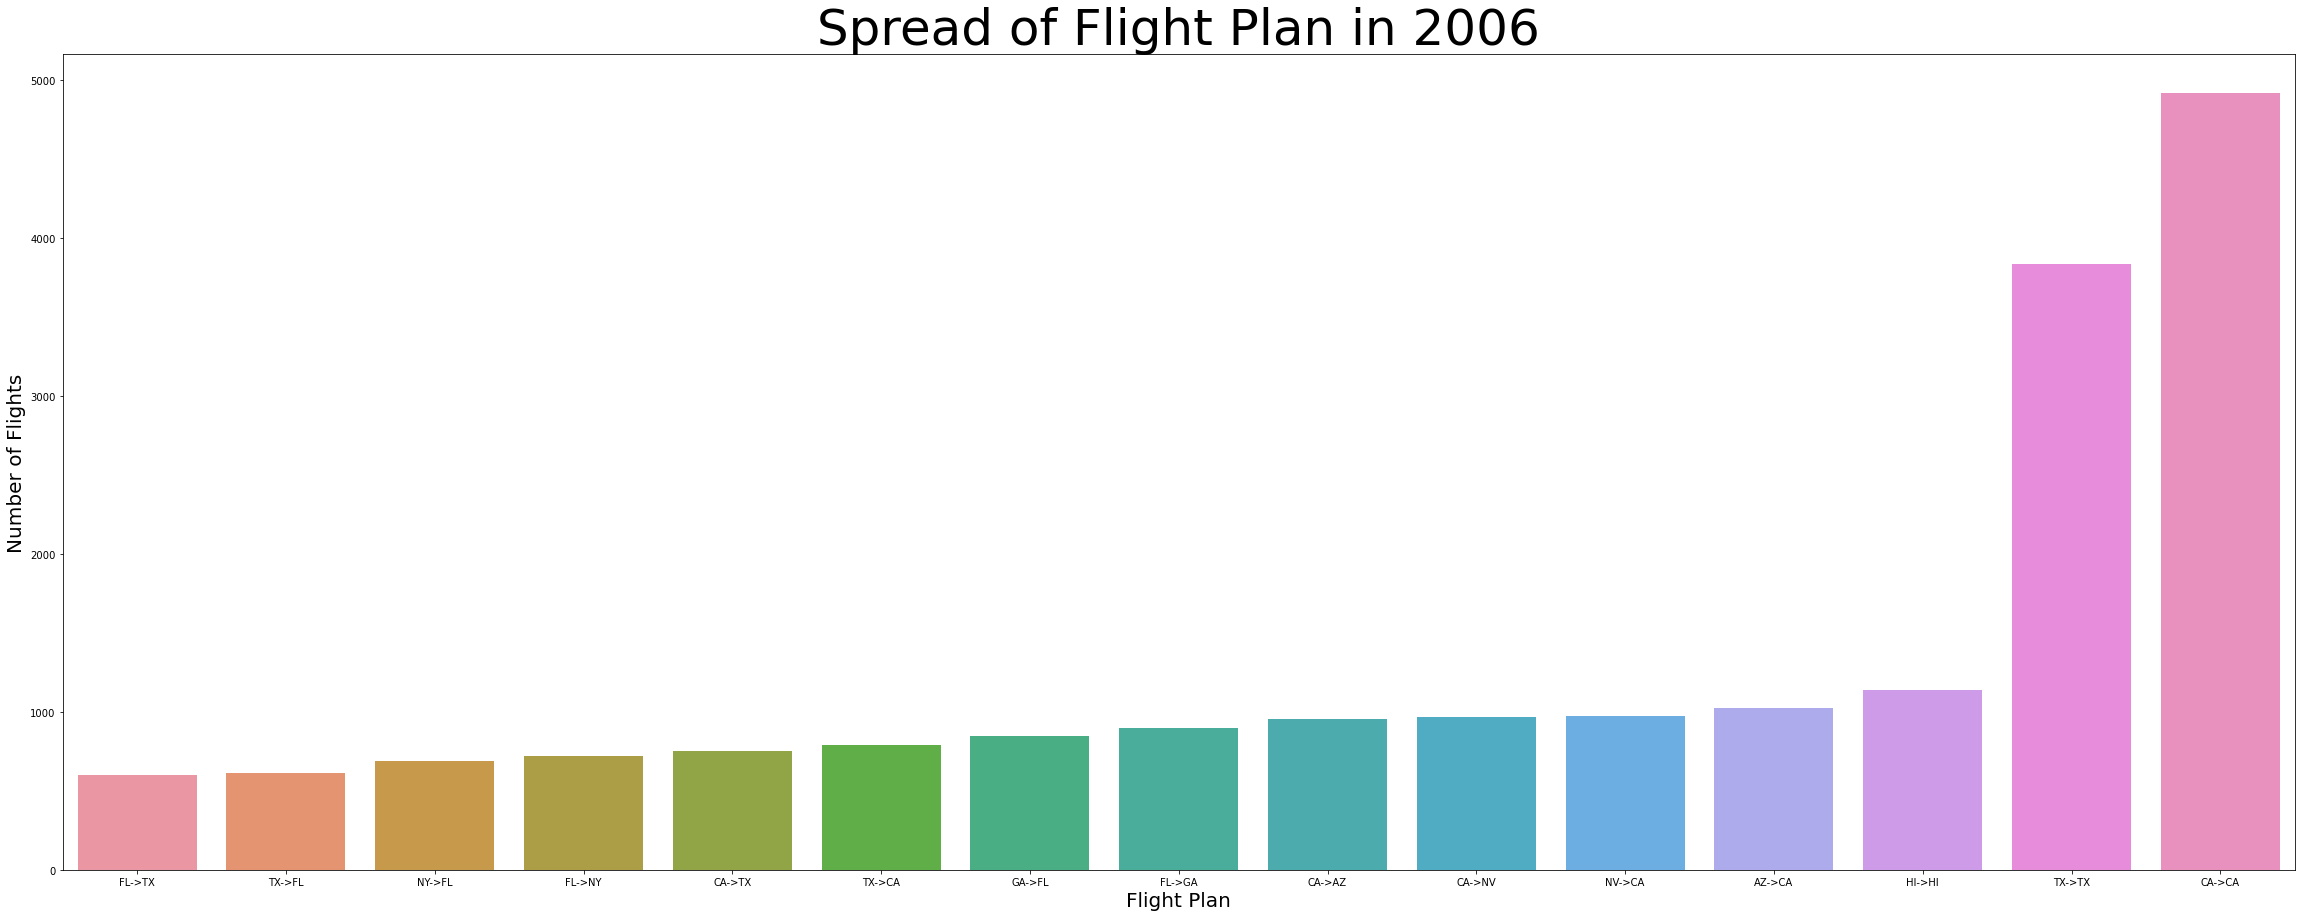

In [40]:
#Bar Plot of Top 15 flight plans in 2006
plt.figure(figsize = (40,15))
sns.barplot(x = "Flight Plan", y = "size", 
    data = flightplan_2006.sort_values("size", ascending = False).head(n=15),
    order = flightplan_2006.sort_values("size",ascending=False).head(n=15).sort_values("size",ascending = True)["Flight Plan"])
plt.xticks(rotation = 0)
plt.xlabel("Flight Plan", fontsize = 20)
plt.ylabel("Number of Flights", fontsize = 20)
plt.title("Spread of Flight Plan in 2006", fontsize = 50)
plt.show()

In [41]:
#Grouping by flight plan and calculating size of each unique flight plan in 2007
flightplan_2007 = data_of_2007_q3_sample.groupby(["Flight Plan"], as_index = False).size()
flightplan_2007.head()

,Flight Plan,size
0,AK->AK,354
1,AK->AZ,6
2,AK->CA,7
3,AK->CO,5
4,AK->GA,1


In [42]:
#Showing all flight plan in descending order for 2007
print(flightplan_2007.sort_values("size", ascending = False).head(n=15))

     Flight Plan  size
93        CA->CA  5045
1100      TX->TX  3327
285       HI->HI  1389
54        AZ->CA   999
199       FL->GA   973
92        CA->AZ   964
801       NV->CA   959
115       CA->NV   953
238       GA->FL   902
841       NY->FL   742
216       FL->NY   738
123       CA->TX   736
1069      TX->CA   732
131       CO->CA   583
224       FL->TX   572


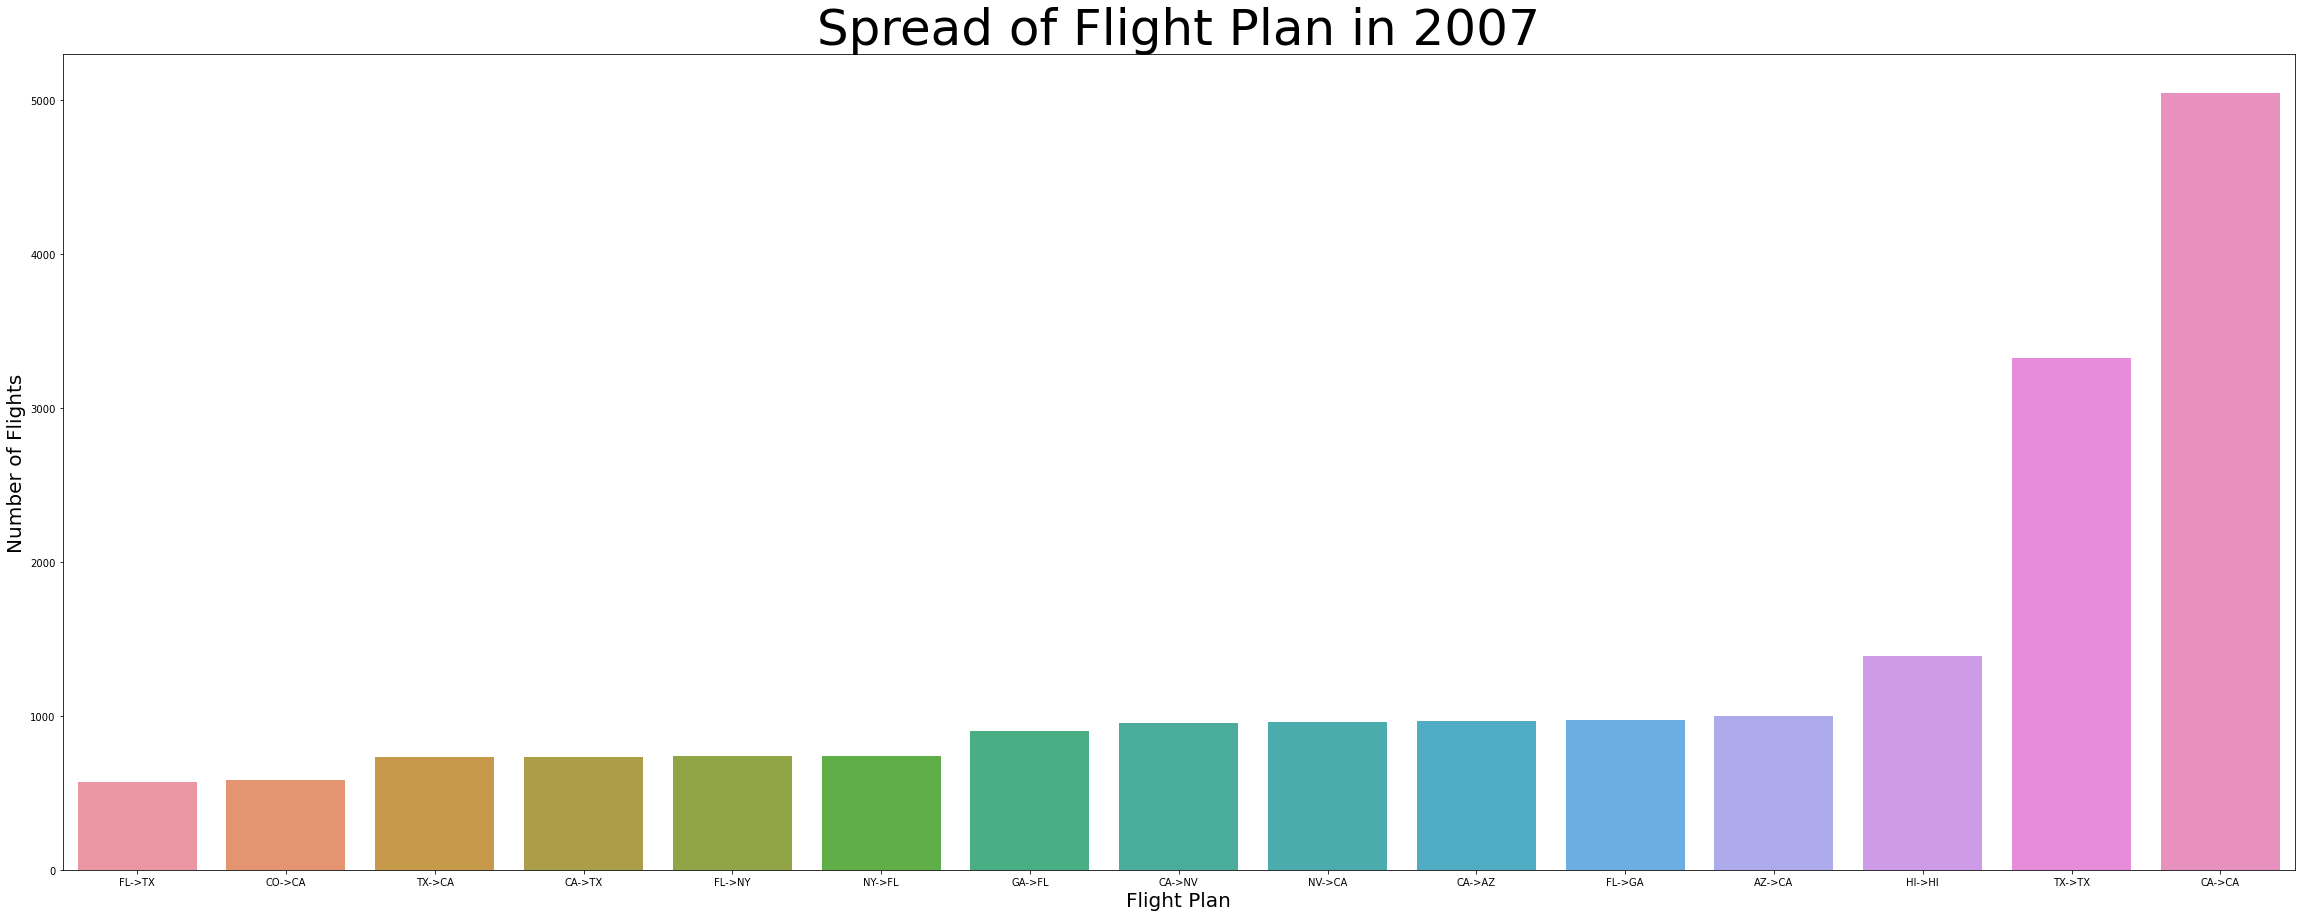

In [43]:
#Bar Plot of Top 15 flight plans in 2007
plt.figure(figsize = (40,15))
sns.barplot(x = "Flight Plan", y = "size", 
    data = flightplan_2007.sort_values("size", ascending = False).head(n=15),
    order = flightplan_2007.sort_values("size", ascending = False).head(n=15).sort_values("size", ascending = True)["Flight Plan"])
plt.xticks(rotation = 0)
plt.xlabel("Flight Plan", fontsize = 20)
plt.ylabel("Number of Flights", fontsize = 20)
plt.title("Spread of Flight Plan in 2007", fontsize = 50)
plt.show()

# Question 4

## Initial Finding of Data for 2006

In [44]:
data_2006q4_DepDelay = data_of_2006_clean[["Year","Month","DayofMonth","DayOfWeek","TailNum","Dest","DepDelay"]]
data_2006q4_DepDelay = data_2006q4_DepDelay.rename({"Dest": "common_airport"})
data_2006q4_DepDelay = data_2006q4_DepDelay[data_2006q4_DepDelay["DepDelay"]>0]

In [45]:
data_2006q4_ArrDelay = data_of_2006_clean[["Year","Month","DayofMonth","DayOfWeek","TailNum","Origin","ArrDelay"]]
data_2006q4_ArrDelay = data_2006q4_ArrDelay.rename({"Origin": "common_airport"})

In [46]:
data_of_2006q4_merged = pd.merge(data_2006q4_DepDelay, data_2006q4_ArrDelay, how = "inner")

In [47]:
data_of_2006q4_merged[["Year","Month","DayofMonth","DayOfWeek","TailNum","DepDelay","ArrDelay"]].head(n=10)

,Year,Month,DayofMonth,DayOfWeek,TailNum,DepDelay,ArrDelay
0,2006,1,11,3,N177UW,5.0,20.0
1,2006,1,11,3,N177UW,5.0,55.0
2,2006,1,11,3,N177UW,5.0,69.0
3,2006,1,11,3,N177UW,28.0,20.0
4,2006,1,11,3,N177UW,28.0,55.0
5,2006,1,11,3,N177UW,28.0,69.0
6,2006,1,11,3,N177UW,94.0,20.0
7,2006,1,11,3,N177UW,94.0,55.0
8,2006,1,11,3,N177UW,94.0,69.0
9,2006,1,11,3,N808MD,2.0,14.0


## Initial Finding of Data for 2007

In [48]:
data_2007q4_DepDelay = data_of_2007_clean[["Year","Month","DayofMonth","DayOfWeek",
                                           "TailNum","Dest","DepDelay"]]
data_2007q4_DepDelay = data_2007q4_DepDelay.rename({"Dest": "common_airport"})
data_2007q4_DepDelay = data_2007q4_DepDelay[data_2007q4_DepDelay["DepDelay"]>0]

In [49]:
data_2007q4_ArrDelay = data_of_2007_clean[["Year","Month","DayofMonth","DayOfWeek",
                                           "TailNum","Origin","ArrDelay"]]
data_2007q4_ArrDelay = data_2007q4_ArrDelay.rename({"Origin": "common_airport"})

In [50]:
data_of_2007q4_merged = pd.merge(data_2007q4_DepDelay, data_2007q4_ArrDelay, how = "inner")

In [51]:
data_of_2007q4_merged[["Year","Month","DayofMonth","DayOfWeek","TailNum",
                       "DepDelay","ArrDelay"]].head(n=10)

,Year,Month,DayofMonth,DayOfWeek,TailNum,DepDelay,ArrDelay
0,2007,1,1,1,N351,7.0,1.0
1,2007,1,1,1,N351,7.0,3.0
2,2007,1,1,1,N351,7.0,19.0
3,2007,1,1,1,N351,7.0,8.0
4,2007,1,1,1,N351,7.0,18.0
5,2007,1,1,1,N351,7.0,3.0
6,2007,1,1,1,N351,7.0,1.0
7,2007,1,1,1,N351,7.0,9.0
8,2007,1,1,1,N351,7.0,16.0
9,2007,1,1,1,N351,9.0,1.0


## Findings using top 8 airports

In [52]:
origin_top = data_merged2["Origin"].value_counts()[:8].index
dest_top = data_merged2["Dest"].value_counts()[:8].index
print("Top 8 origin:", origin_top, "\n", "Top 8 destination:", dest_top)

Top 8 origin: Index(['ATL', 'ORD', 'DFW', 'PHX', 'DEN', 'LAX', 'LAS', 'IAH'], dtype='object') 
 Top 8 destination: Index(['ATL', 'ORD', 'DFW', 'PHX', 'LAX', 'LAS', 'DEN', 'IAH'], dtype='object')


In [53]:
data_merged_q4 = data_merged2[(data_merged2["Origin"].isin(origin_top))
                              &(data_merged2["Dest"].isin(dest_top))]

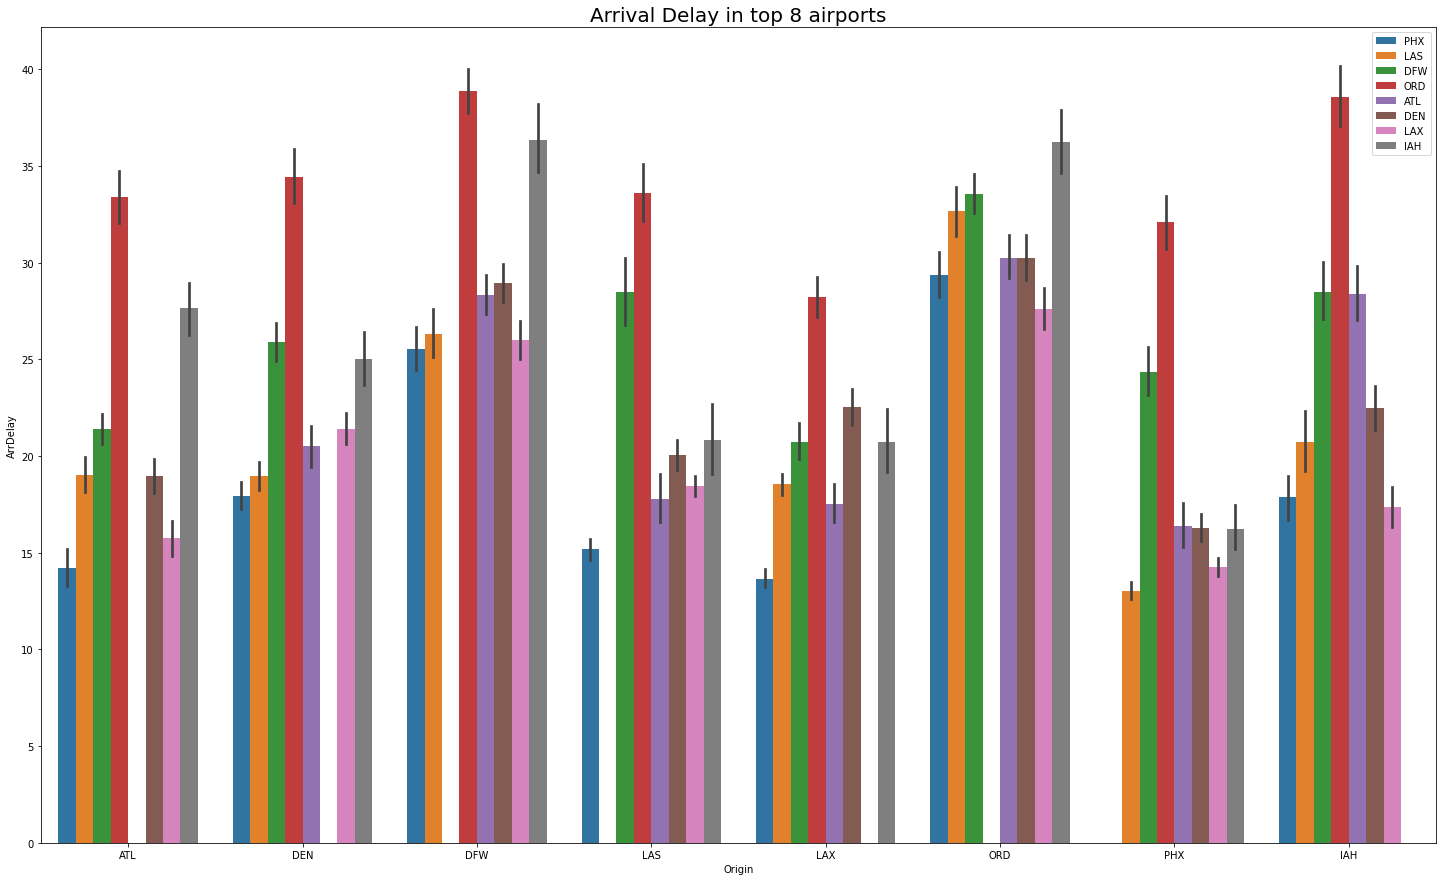

In [54]:
#Plot of arrival delay using top 8 airports
plt.figure(figsize = (25,15))
sns.barplot(x = "Origin", y = "ArrDelay", hue = "Dest", data = data_merged_q4)
plt.title("Arrival Delay in top 8 airports", fontsize = 20)
plt.xticks(rotation = 0)
plt.legend(loc = "upper right")
plt.show()

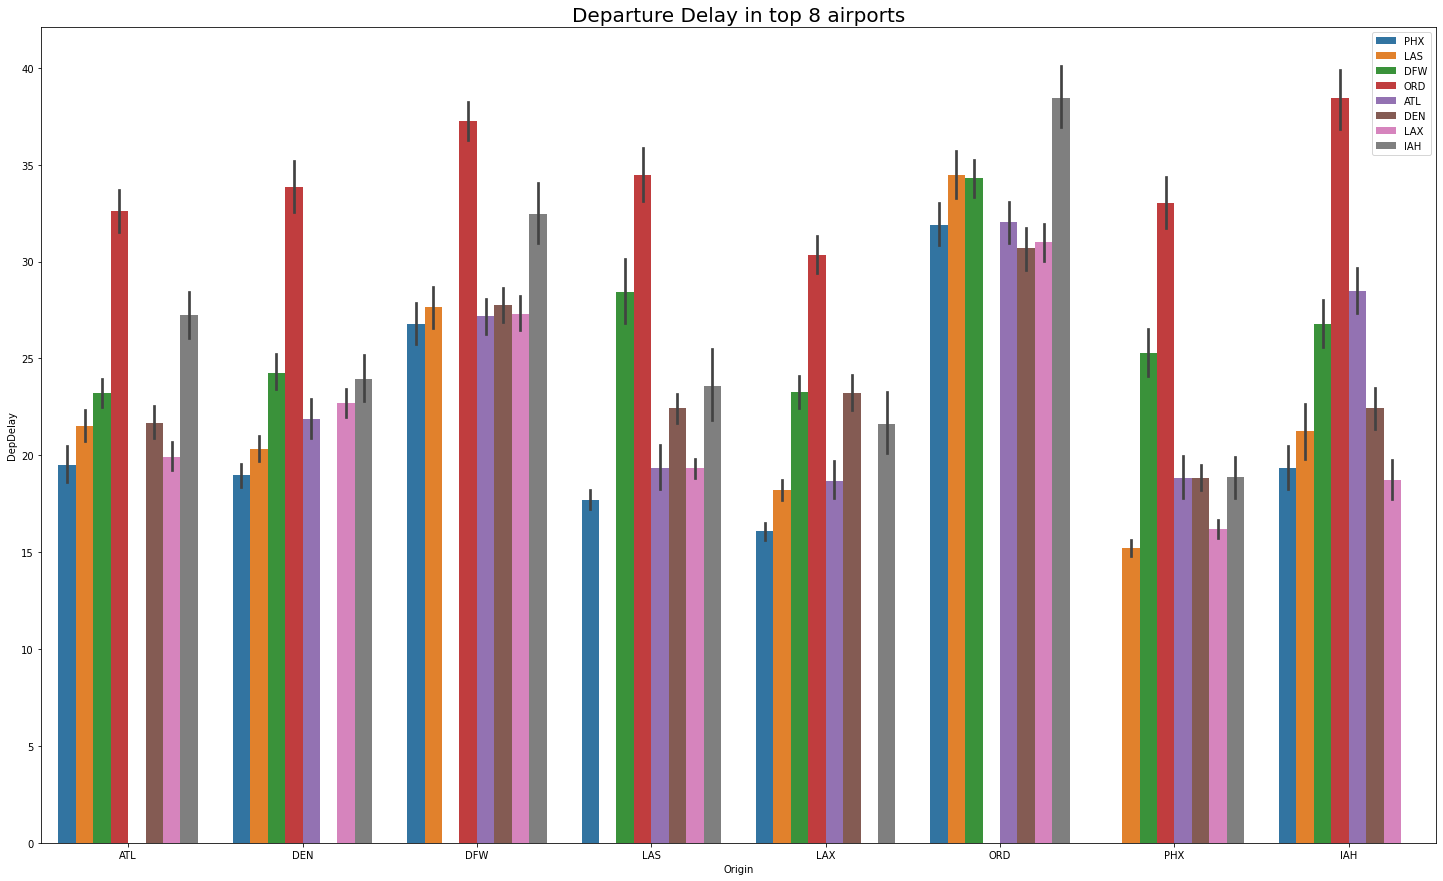

In [55]:
#Plot of departure delay using top 8 airports
plt.figure(figsize = (25,15))
sns.barplot(x = "Origin", y = "DepDelay", hue = "Dest", data = data_merged_q4)
plt.title("Departure Delay in top 8 airports", fontsize = 20)
plt.xticks(rotation = 0)
plt.legend(loc = "upper right")
plt.show()

## Findings correlation between arrival delay and departure delay

In [56]:
#Combining data_of_2006q4_merged and data_of_2007q4_merged to see correlation between arr&dep delay in common airport
data_mergedq4 = pd.concat([data_of_2006q4_merged, data_of_2007q4_merged])

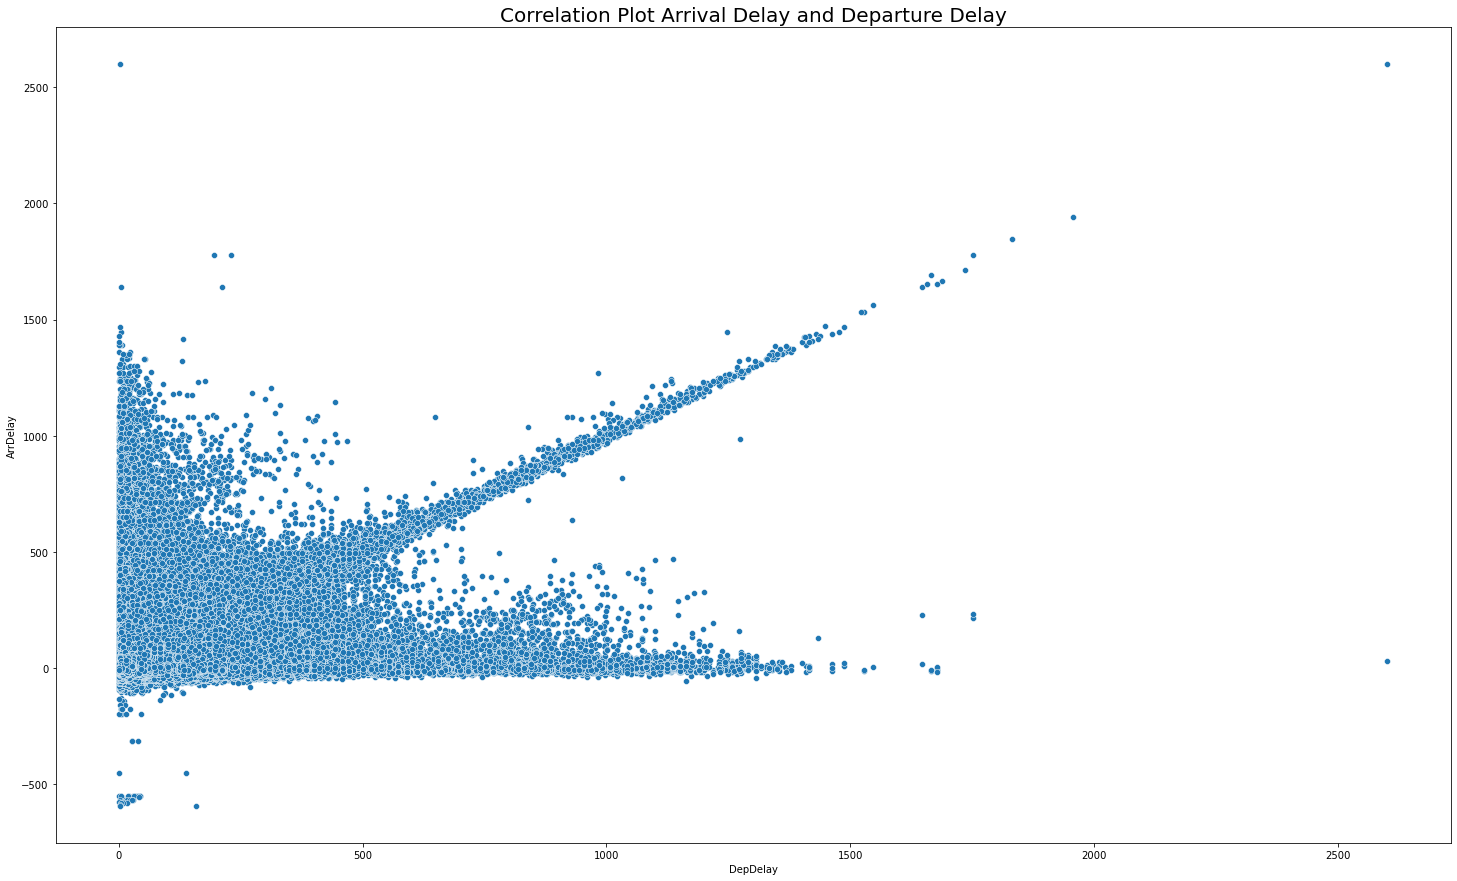

In [57]:
#plotting correlation between arrival delay and departure delay
plt.figure(figsize = (25,15))
sns.scatterplot(x = "DepDelay", y = "ArrDelay", data = data_mergedq4)
plt.title("Correlation Plot Arrival Delay and Departure Delay", fontsize = 20)
plt.show()

In [58]:
#Calculating correlation between ArrDelay and DepDelay
data_mergedq4[["ArrDelay", "DepDelay"]].corr()

,ArrDelay,DepDelay
ArrDelay,1.000000,0.497651
DepDelay,0.497651,1.000000


# Question 5

In [59]:
np.random.seed(25)
data_merged_sample = data_merged.sample(n = 100000)
data_merged_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 3453017 to 4801166
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               100000 non-null  int64  
 1   Month              100000 non-null  int64  
 2   DayofMonth         100000 non-null  int64  
 3   DayOfWeek          100000 non-null  int64  
 4   DepTime            98056 non-null   float64
 5   CRSDepTime         100000 non-null  int64  
 6   ArrTime            97806 non-null   float64
 7   CRSArrTime         100000 non-null  int64  
 8   UniqueCarrier      100000 non-null  object 
 9   FlightNum          100000 non-null  int64  
 10  TailNum            100000 non-null  object 
 11  ActualElapsedTime  97806 non-null   float64
 12  CRSElapsedTime     99998 non-null   float64
 13  AirTime            97806 non-null   float64
 14  ArrDelay           97806 non-null   float64
 15  DepDelay           98056 non-null   float64


In [60]:
TotalDelayColumns = ["ArrDelay","DepDelay","CarrierDelay","WeatherDelay"
                     ,"NASDelay","SecurityDelay","LateAircraftDelay"]
data_merged_sample["TotalDelay"] = data_merged_sample[TotalDelayColumns].sum(axis = 1)
data_merged_sample

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotalDelay
3453017,2007,6,19,2,556.0,600,811.0,808,FL,600,...,7,0,NaN,0,0,0,0,0,0,-1.0
2707292,2006,5,6,6,1243.0,1230,1410.0,1420,MQ,4868,...,7,0,NaN,0,0,0,0,0,0,3.0
5625361,2006,10,10,2,728.0,730,841.0,848,US,1804,...,13,0,NaN,0,0,0,0,0,0,-9.0
5237422,2006,9,15,5,829.0,835,1323.0,1335,AA,2044,...,21,0,NaN,0,0,0,0,0,0,-18.0
3104965,2007,6,11,1,1240.0,1215,1454.0,1440,WN,1135,...,19,0,NaN,0,0,0,0,0,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474432,2006,3,21,2,1227.0,1230,1317.0,1323,MQ,3074,...,6,0,NaN,0,0,0,0,0,0,-9.0
2620893,2006,5,27,6,2055.0,2055,2151.0,2156,EV,4524,...,19,0,NaN,0,0,0,0,0,0,-5.0
5310038,2006,9,9,6,1716.0,1711,1819.0,1823,DL,1748,...,11,0,NaN,0,0,0,0,0,0,1.0
1577629,2007,3,26,1,917.0,910,1035.0,1036,FL,662,...,14,0,NaN,0,0,0,0,0,0,6.0


In [61]:
#Filling up NA for Machine Learning + Data cleaning
data_merged_sample = data_merged_sample[data_merged_sample["Cancelled"] == 0]
data_merged_sample = data_merged_sample.drop(["DepTime","ArrTime","Cancelled","CancellationCode"], axis = 1)
data_merged_sample["ArrDelay"].fillna(data_merged_sample["ArrDelay"].mean(), inplace = True)
data_merged_sample["DepDelay"].fillna(data_merged_sample["DepDelay"].mean(), inplace = True)
data_merged_sample["ActualElapsedTime"].fillna(data_merged_sample["ActualElapsedTime"].mean(), inplace = True)
data_merged_sample["AirTime"].fillna(data_merged_sample["AirTime"].mean(), inplace = True)
data_merged_sample["CRSElapsedTime"].fillna(data_merged_sample["CRSElapsedTime"].mean(), inplace = True)

In [62]:
nominalcolumns = ["UniqueCarrier","FlightNum","TailNum","Origin","Dest","Diverted"]
skewcolumns = ["AirTime","Distance","TaxiIn","TaxiOut"]

In [63]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
for i in skewcolumns:
    data_merged_sample[i] = scale.fit_transform(data_merged_sample[[i]])

In [64]:
data_merged_sample = pd.get_dummies(data_merged_sample, 
                                columns = nominalcolumns, drop_first = True)

In [65]:
data_merged_sample

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,...,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM,Diverted_1
3453017,2007,6,19,2,600,808,135.0,128.0,0.736430,3.0,...,0,0,0,0,0,0,0,0,0,0
2707292,2006,5,6,6,1230,1420,87.0,110.0,0.724694,-10.0,...,0,0,0,0,0,0,0,0,0,0
5625361,2006,10,10,2,730,848,73.0,78.0,0.715403,-7.0,...,0,0,0,0,0,0,0,0,0,0
5237422,2006,9,15,5,835,1335,174.0,180.0,0.760880,-12.0,...,0,0,0,0,0,0,0,0,0,0
3104965,2007,6,11,1,1215,1440,134.0,145.0,0.741320,14.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474432,2006,3,21,2,1230,1323,50.0,53.0,0.703667,-6.0,...,0,0,0,0,0,0,0,0,0,0
2620893,2006,5,27,6,2055,2156,56.0,61.0,0.705623,-5.0,...,0,0,0,0,0,0,0,0,0,0
5310038,2006,9,9,6,1711,1823,63.0,72.0,0.709046,-4.0,...,0,0,0,0,0,0,0,0,0,0
1577629,2007,3,26,1,910,1036,78.0,86.0,0.718337,-1.0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
#Train Test Split of data, into training and test data
from sklearn.model_selection import train_test_split
data_merged_sample_train, data_merged_sample_test = train_test_split(data_merged_sample, 
                                                                    train_size = 0.7, 
                                                                     test_size = 0.3,
                                                                     random_state = 19)

In [67]:
x_values_train = data_merged_sample_train.drop(["ArrDelay", "DepDelay", "CarrierDelay", 
                                    "WeatherDelay", "NASDelay", 
                                    "SecurityDelay", "LateAircraftDelay"], axis = 1)
y_values_train = data_merged_sample_train["TotalDelay"]

x_values_test = data_merged_sample_test.drop(["ArrDelay", "DepDelay", "CarrierDelay", 
                                    "WeatherDelay", "NASDelay", 
                                    "SecurityDelay", "LateAircraftDelay"], axis = 1)
y_values_test = data_merged_sample_test["TotalDelay"]

In [68]:
#Importing and fitting training data into linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_values_train, y_values_train)

LinearRegression()

In [69]:
#Predict Test Data
linreg_y_values_predict = linreg.predict(x_values_test)

In [70]:
from sklearn.metrics import mean_squared_error
import math
linreg_mse = round(mean_squared_error(y_values_test, linreg_y_values_predict), 3)
math.sqrt(linreg_mse)

0.0

In [71]:
#Importing and fitting training data into random forest model
from sklearn.ensemble import RandomForestRegressor
ranfor = RandomForestRegressor()
ranfor.fit(x_values_train, y_values_train)

RandomForestRegressor()

In [72]:
ranfor_y_values_predict = ranfor.predict(x_values_test)

In [73]:
ranfor_mse = round(mean_squared_error(y_values_test, ranfor_y_values_predict), 3)
math.sqrt(ranfor_mse)

3.180880381278114

In [74]:
print("Linear Regression:", math.sqrt(linreg_mse), "vs", "Random Forest:", math.sqrt(ranfor_mse))

Linear Regression: 0.0 vs Random Forest: 3.180880381278114
